In [1]:
#Gamma变换就是用来图像增强，其提升了暗部细节，简单来说就是通过非线性变换，让图像从暴光强度的线性响应变得更接近人眼感受的响应，
#即将漂白（相机曝光）或过暗（曝光不足）的图片，进行矫正。
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename='../GG.png'
img = cv2.imread(filename)
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey = cv2.resize(grey,(600,400))

In [3]:
def Residual(residual,size,title):
    plt.subplot(size)
    plt.title(title)
    plt.imshow(residual)

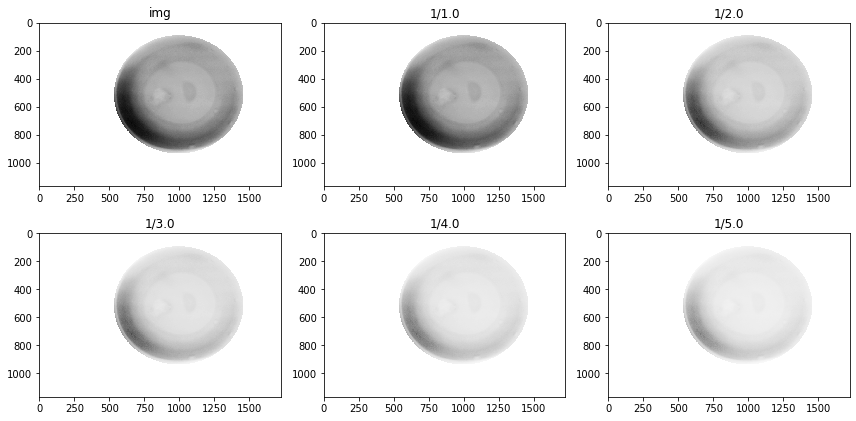

In [4]:
plt.figure(figsize=(12,6))
Residual(img,231,'img')

paras=[1.0,2.0,3.0,4.0,5.0]
#enumerate:序列对应，0—1.0，1-2.0
for i,para in enumerate(paras):
    Residual(np.power(img/float(np.max(img)), 1/para),232+i,'1/%.1f'%para)
    
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
#plt.show()

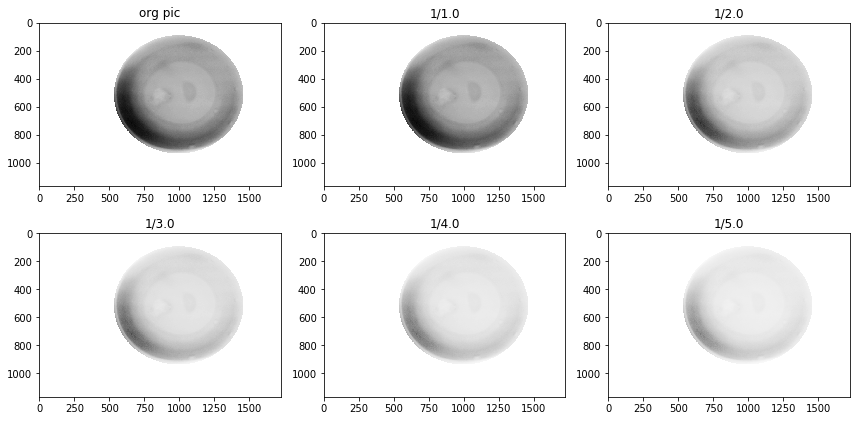

In [5]:
paras=[1.0,2.0,3.0,4.0,5.0]
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.title("org pic")
plt.imshow(img)
#变换公式就是对原图像上每一个像素值做乘积运算
for i, para in enumerate(paras):
    plt.subplot(232+i)
    plt.title('1/%.1f'%para)
    #np.power求1/para的次方
    img1 = np.power(img/float(np.max(img)), 1/para)
    plt.imshow(img1)
plt.tight_layout()
plt.show()


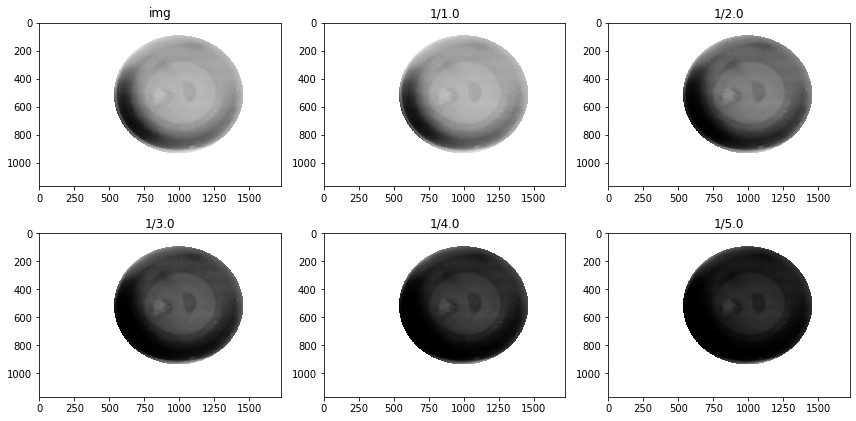

In [9]:
filename='../GG.png'
img = cv2.imread(filename)
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey = cv2.resize(grey,(600,400))

plt.figure(figsize=(12,6))
Residual(img,231,'img')

paras=[1.0,2.0,3.0,4.0,5.0]
#enumerate:序列对应，0—1.0，1-2.0
for i,para in enumerate(paras):
    Residual(np.power(img/float(np.max(img)), para),232+i,'1/%.1f'%para)
    
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域

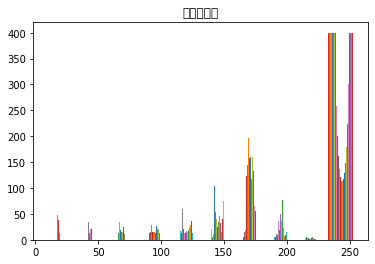

In [10]:
plt.hist(grey)
plt.title('灰度直方图')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
import matplotlib.pyplot as plt

In [11]:
filename='../GG.png'
img=cv2.imread(filename)
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey=cv2.resize(grey,(600,400))

In [12]:
eq = cv2.equalizeHist(grey)#灰度图片直方图均衡化
cv2.imshow('image1',img)
cv2.imshow('image2',eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#coding=utf-8
import cv2
import numpy as np

image = cv2.imread('../GG.png', 0)
lut = np.zeros(256, dtype = image.dtype )#创建空的查找表
hist= cv2.calcHist([image], #计算图像的直方图
    [0], #使用的通道
    None, #没有使用mask
    [256], #it is a 1D histogram
    [0.0,255.0])
minBinNo, maxBinNo = 0, 255

 #计算从左起第一个不为0的直方图柱的位置
for binNo, binValue in enumerate(hist):
    if binValue != 0:
        minBinNo = binNo
        break

#计算从右起第一个不为0的直方图柱的位置
for binNo, binValue in enumerate(reversed(hist)):
    if binValue != 0:
        maxBinNo = 255-binNo
        break
print(minBinNo, maxBinNo)
#生成查找表，方法来自参考文献1第四章第2节
for i,v in enumerate(lut):
    if i < minBinNo:
        lut[i] = 0
    elif i > maxBinNo:
        lut[i] = 255
    else:
        lut[i] = int(255.0*(i-minBinNo)/(maxBinNo-minBinNo)+0.5)
#计算
result = cv2.LUT(image, lut)
cv2.imshow("Result", result)
cv2.imwrite("LutImage.jpg", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

3 233


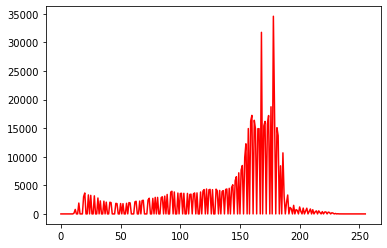

In [14]:
hist = cv2.calcHist([image],[0],None,[256],[0,255])
plt.plot(hist,'r')
plt.show()

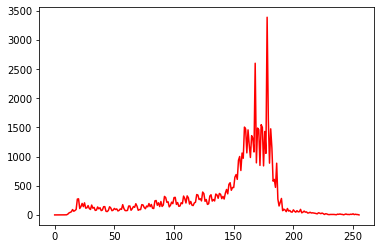

In [16]:
import cv2
import matplotlib.pyplot as plt

filename='../GG.png'
img=cv2.imread(filename)
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey=cv2.resize(grey,(600,400))

hist = cv2.calcHist([grey],[0],None,[256],[0,255])
plt.plot(hist,'r')
plt.show()

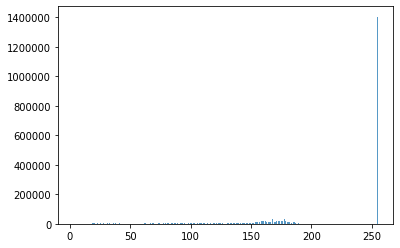

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img=np.array(Image.open('../GG.png').convert('L')) #模式L为灰色图像
plt.figure("image")
arr=img.flatten()#折叠成一维的数组
n,bins,patches=plt.hist(arr,bins=256,alpha=0.75)
plt.show()

D:\360Downloads\conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
D:\360Downloads\conda\envs\tensor\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
D:\360Downloads\conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


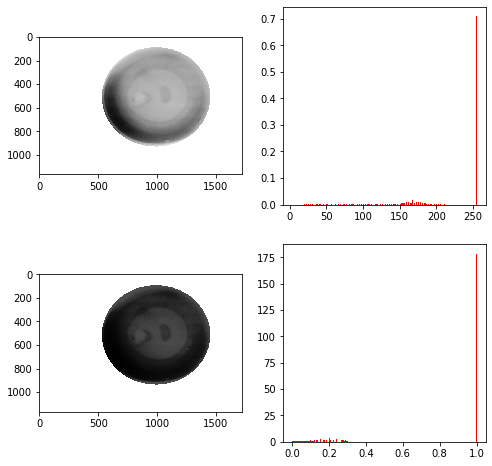

In [27]:
from skimage import data,exposure
import matplotlib.pyplot as plt
img= cv2.imread('../GG.png')
plt.figure("hist",figsize=(8,8))

arr=img.flatten()
plt.subplot(221)
plt.imshow(img,plt.cm.gray)  #原始图像
plt.subplot(222)
plt.hist(arr, bins=256, normed=1,edgecolor='None',facecolor='red') #原始图像直方图

img1=exposure.equalize_hist(img)
arr1=img1.flatten()
plt.subplot(223)
plt.imshow(img1,plt.cm.gray)  #均衡化图像
plt.subplot(224)
plt.hist(arr1, bins=256, normed=1,edgecolor='None',facecolor='red') #均衡化直方图

plt.show()

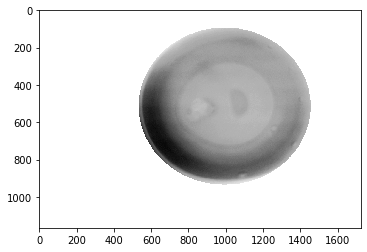

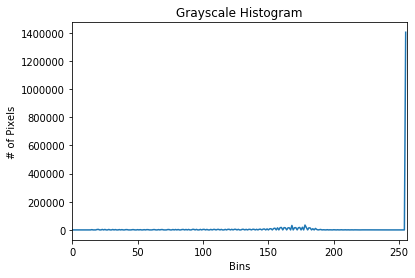

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('../GG.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap=plt.cm.gray)

hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#  两个图片的像素分布连接在一起，拍成一维数组,图片拼成一幅图

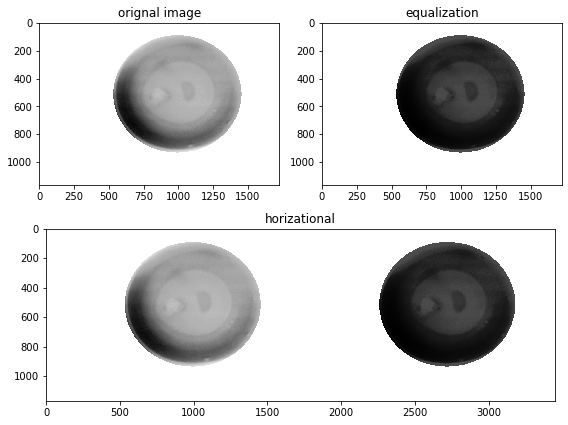

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../GG.png',0)
# histogram equalization
equ = cv2.equalizeHist(img)
# 两个图片的像素分布连接在一起，拍成一维数组
res = np.hstack((img,equ))

plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((2,2),(0, 0))
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('orignal image')

ax1 = plt.subplot2grid((2, 2), (0, 1))
ax1.imshow(equ, cmap=plt.cm.gray)
ax1.set_title('equalization')

ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=3, rowspan=1)
ax1.imshow(res, cmap=plt.cm.gray)
ax1.set_title('horizational')

plt.tight_layout()
plt.show()

True

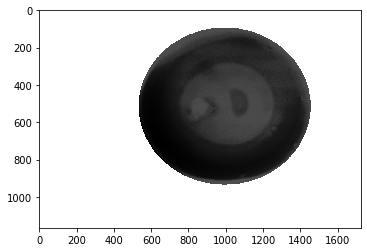

In [30]:
# -*- coding: UTF-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../GG.png', 1)
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
result = cv2.merge((bH, gH, rH))
plt.imshow(result,'gray')
cv2.imwrite("过曝光直方图均衡.jpg",result)